In [10]:
import sys
from glob import glob
import numpy as np
import pandas as pd
import wfdb
import biosignalsnotebooks as bsnb
from wfdb import processing
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

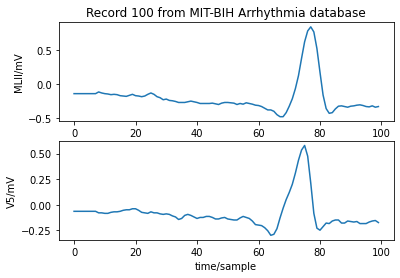

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 100,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        [-0.12 , -0.08 ],
        [-0.135, -0.08 ],
        [-0.145, -0.085],
        [-0.15 , -0.085],
        [-0.16 , -0.075],
        [-0.155, -0.07 ],
        [-0.16 , -0.07 ],
        [-0.175, -0.065],
        [-0.18 , -0.055],
        [-0.185, -0.05 ],
        [-0.17 , -0.05 ],
        [-0.155, -0.04 ],
        [-0.175, -0.04 ],
        [-0.18 , -0.055],
        [-0.19 , -0.075],
        [-0.18 , -0.08 ],
        [-0.155, -0.085],
        [-0.135, -0.07 ],
        [-0.155, -0.08 ],
        [-0.19 , -0.08 ],
        [-0.205, -0.09 ]

In [16]:
store = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/100'
record = wfdb.rdrecord(store, sampto=100)
wfdb.plot_wfdb(record, title='Record 100 from MIT-BIH Arrhythmia database') 
display(record.__dict__)

In [13]:
# data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


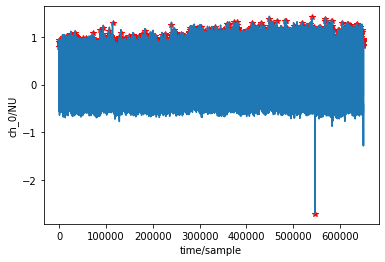

In [18]:
sig, fields = wfdb.rdsamp(store, channels=[0])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [19]:
# file_path = glob.glob('./mit-bih-arrhythmia-database-1.0.0/*.atr')
# files = [i[:-4] for i in file_path]
# files.sort()


# file = './mit-bih-arrhythmia-database-1.0.0/100'

# ann_ref = wfdb.rdann(file, 'atr')

# number_of_rpeaks = len(ann_ref.symbol)

# values = np.zeros((48,2))
# classes = ['N','R','L','V','A','E']
# for i in range(len(files)):
#     signals, fields = wfdb.rdsamp(files[i])
#     annotation = wfdb.rdann(files[i], 'atr')
#     for j in classes:
#         ids = np.in1d(annotation.symbol, j)
#         beats = annotation.sample[ids]
#         values[i] = [j,len(beats)]

# print(values)



# n = ['N']
# v = ['V']

# check_normal = np.in1d(ann_ref.symbol, n)
# check_v = np.in1d(ann_ref.symbol, v)

# normal_beats = ann_ref.sample[check_normal]
# v_beats = ann_ref.sample[check_v]

# print(len(check_normal))

# comparitor = processing.compare_annotations(ann_ref.sample[1:], xqrs.qrs_inds, int(0.1 * fields['fs']), sig[:,0])
# comparitor.print_summary()
# comparitor.plot()

In [22]:
path = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/*.atr'
def get_data():
    file_path = glob(path)
    files = [i[:-4] for i in file_path]
    files.sort()
    return files
# print(len(get_data()))
ann_list = []
file_list = get_data()
for i in range(len(file_list)): #going through each of the 48 files...
    data_file = file_list[i] #one file of the 48
    record = wfdb.rdsamp(data_file)  #returns an array of the sample
    ann_ref = wfdb.rdann(data_file, 'atr') #reading annotations in the file
    ann_list.extend(ann_ref.symbol)
    
ann_array = np.array(ann_list)
print(ann_array.shape)
for i in ann_array:
    if i == 'N' # do the in1d thing here to store each type in one array each.
                # then plot a histogram using the different arrays?
                # or use count variables for the histogram?

# print(np.array(ann_ref.symbol).shape)
# print(record[1].get('fs'))
# print(record[0].shape)
# print(len(ann_ref.num)) #prints number of annotations (no of beats) 
#num is the labelled annotation number for each annotation
# print(ann_ref.symbol)

(112647,)


(2764,) (28,)


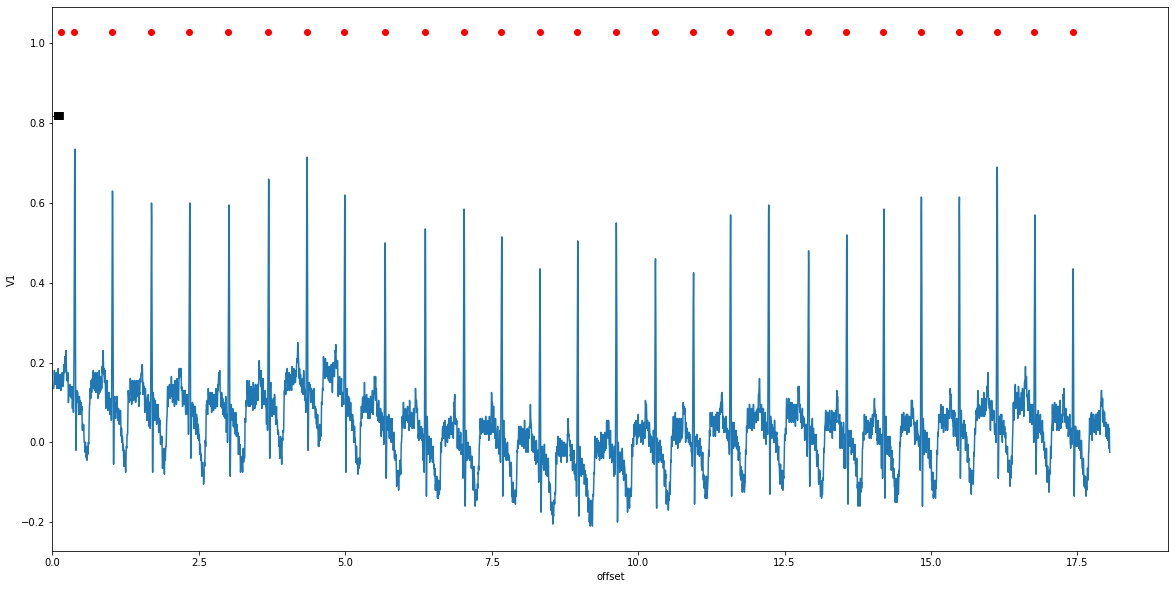

In [23]:
#Visualising the data
samp_start = 0
samp_end = 6500
samples = samp_end - samp_start
#picking first record, picking first channel, 
#going from samp_start to samp_end in that channel
channel = record[0][samp_start:samp_end, 1]

time = (np.arange(samples, dtype='float')+ samp_start)/record[1].get('fs')

plt.figure(figsize=(20,10))
plt.plot(time,channel)


peak_location=np.logical_and(ann_ref.sample >= samp_start, ann_ref.sample < samp_end)
#.sample returns a numpy array containing the annotation locations in samples relative to the beginning of the record
#i.e., where each beat is
anns = ann_ref.sample[peak_location] - samp_start
ann_types = np.array(ann_ref.symbol)
req_ann_types = ann_types[peak_location]
print(ann_types.shape, req_ann_types.shape)


ann_time = time[anns]
plt.plot(ann_time, np.ones_like(ann_time)*channel.max()*1.4,'ro')


for index, annotation in enumerate(anns):
    plt.annotate(ann_types[index], xy = (time[index], channel.max()*1.1))

    
plt.xlim([samp_start / record[1].get('fs'), (samp_end/record[1].get('fs'))+1])
plt.xlabel('offset')
plt.ylabel(record[1].get('sig_name')[1])
plt.show()